In [48]:
import json
import csv
import sys

db = 49220

def szures(s):
	s = s.lower()
	s = s.replace("\u00e0", "a")
	s = s.replace("\u0103", "a")
	s = s.replace("\u00e1", "a")
	s = s.replace("\u00e2", "a")
	s = s.replace("\u0391", "a")
	s = s.replace("\u03b1", "a")
	
	s = s.replace("\u00e9", "e")
	s = s.replace("\u00e8", "e")
	
	s = s.replace("\u00ed", "i")
	s = s.replace("\u00ec", "i")
	s = s.replace("\u00ee", "i")
	
	s = s.replace("\u00f3", "o")
	s = s.replace("\u00f6", "o")
	s = s.replace("\u0151", "o")
	s = s.replace("\u039f", "o")
	
	s = s.replace("\u039b", "l")
	
	s = s.replace("\u00fa", "u")
	s = s.replace("\u0171", "u")
	s = s.replace("\u00fc", "u")
	s = s.replace("\u016b", "u")
	
	s = s.replace("\u015f", "s")
	s = s.replace("\u0219", "s")
	
	s = s.replace("\u021b", "t")
	s = s.replace("\u0163", "t")
	
	s = s.replace("\u0e4f", "")
	s = s.replace("\u032f", "")
	s = s.replace("\u0361", "")
	
	s = s.encode('ascii', 'ignore').decode('utf8')
	
	return s

with open("proba.txt") as f:
	s = f.read()
s = szures(s)
data = json.loads(s)

print(data[:5])


[{'id': 0, 'birth': 'keresztur', 'name': 'boholt lore', 'studwhere': 'orbán balázs gimnázium, székelykeresztúr', 'livesin': 'szèkelykeresztur, harghita, romania'}, {'id': 1, 'livesin': 'csikszentdomokos', 'other1': 'venczel józsef iskolaközpont - csíkszereda', 'birth': 'csikszereda', 'name': 'nelut kémenes'}, {'marriedto': 'péterfy eniko', 'studwhere': 'none', 'livesin': 'angyalföld, budapest, hungary', 'workwhere': 'drogmentes világért alapítvány - magyarország', 'name': 'kovács iulia', 'birth': 'udvarhely', 'id': 2, 'workwhat': 'helyettes ügyvezető'}, {'id': 3, 'name': 'monica-ana szep', 'birth': 'barot', 'livesin': 'budapest, hungary'}, {'birth': 'szentgyorgy', 'name': 'matei szabolcs', 'marriedto': 'lászló tünde', 'id': 4}]


In [49]:
def count_occurence_of(col):

    dict = {}
    for i in data:
        if col in i:
            b = szures(i[col])
            if b in dict:
                dict[b] = dict[b] + 1
            else:
                dict[b] = 1
    return dict

birth_cities_count = count_occurence_of("birth")
print(birth_cities_count)

{'keresztur': 2830, 'csikszereda': 3508, 'udvarhely': 3310, 'barot': 2335, 'szentgyorgy': 3494, 'kezdi': 3384, 'kovaszna': 3915, 'szovata': 1522, 'vasarhely': 3823, 'gyergyo': 3461, 'vlahica': 2329, 'segesvar': 2539, 'kolozsvar': 3942, 'balan': 2312, 'regen': 2770, 'toplita': 2564, 'parajd': 1182}


In [50]:
birth_cities = list(birth_cities_count.keys())

stud_dict = dict.fromkeys(birth_cities,0)
for i in data:
    if "studwhere" in i:
        if i["studwhere"] != "None":
            city = i["birth"]
            stud_dict[city] = stud_dict[city] + 1

work_dict = dict.fromkeys(birth_cities,0)            
for i in data:
    if "workwhere" in i or "workwhat" in i:
        city = i["birth"]
        work_dict[city] = work_dict[city] + 1

print(stud_dict)
print(work_dict)

{'keresztur': 1313, 'csikszereda': 1605, 'udvarhely': 1518, 'barot': 1124, 'szentgyorgy': 1623, 'kezdi': 1609, 'kovaszna': 1880, 'szovata': 664, 'vasarhely': 1720, 'gyergyo': 1477, 'vlahica': 964, 'segesvar': 1124, 'kolozsvar': 1767, 'balan': 956, 'regen': 1180, 'toplita': 1192, 'parajd': 459}
{'keresztur': 1585, 'csikszereda': 1777, 'udvarhely': 1673, 'barot': 1258, 'szentgyorgy': 1900, 'kezdi': 1741, 'kovaszna': 2081, 'szovata': 741, 'vasarhely': 2065, 'gyergyo': 1700, 'vlahica': 1132, 'segesvar': 1335, 'kolozsvar': 2235, 'balan': 1107, 'regen': 1436, 'toplita': 1341, 'parajd': 611}


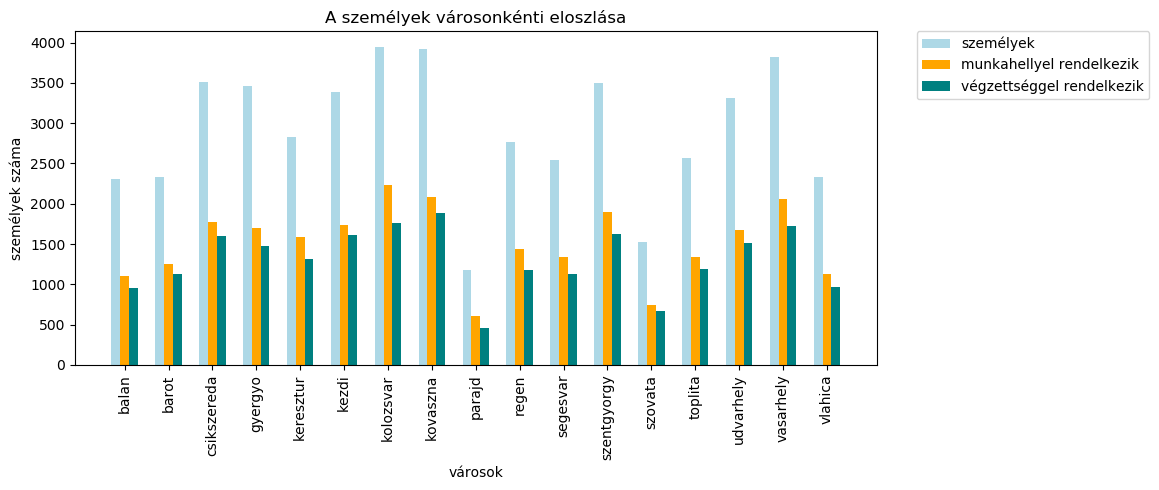

('balan', 'barot', 'csikszereda', 'gyergyo', 'keresztur', 'kezdi', 'kolozsvar', 'kovaszna', 'parajd', 'regen', 'segesvar', 'szentgyorgy', 'szovata', 'toplita', 'udvarhely', 'vasarhely', 'vlahica')


In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 5), dpi=100)

birth_list = sorted(birth_cities_count.items())
stud_list = sorted(stud_dict.items())
work_list = sorted(work_dict.items())
x1, y1 = zip(*birth_list)
x2, y2 = zip(*work_list)
x3, y3 = zip(*stud_list)

bar_width = 0.2
index = np.arange(17)

bar1 = plt.bar(index, y1, bar_width, color='lightblue', label='személyek')
bar2 = plt.bar(index + 0.2, y2, bar_width, color='orange', label='munkahellyel rendelkezik')
bar3 = plt.bar(index + 0.4, y3, bar_width, color='teal', label='végzettséggel rendelkezik')


plt.xticks([i + 0.2 for i in range(17)],sorted(birth_cities), rotation=90)
plt.xlabel("városok")
plt.ylabel("személyek száma")
plt.title("A személyek városonkénti eloszlása")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()
print(x1)

In [52]:
schools = count_occurence_of("studwhere")
s = [(k, schools[k]) for k in sorted(schools, key=schools.get, reverse=True)]
#for key, el in s:
 #   print(key, el)

In [53]:
workwhat = count_occurence_of("workwhat")
#for key, el in jobs.items():
 #   print(key, el)

In [58]:
def studdict(s):
    s = s.lower()
    s = szures(s)
    if "miko" in s: return u"Székely Mikó Kollégium, Sepsiszentgyörgy"
    elif "mikes" in s: return u"Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy"
    elif "nagy mozes" in s: return  u"Nagy Mózes Elméleti Líceum, Kézdivásárhely"
    elif "orban balazs" in s: return u"Orbán Balázs Gimnázium, Székelykeresztúr"
    elif "gabor aron" in s: return u"Gábor Áron Szakképző Líceum, Kézdivásárhely"
    elif "marton" in s \
        or "márton" in s: return u"Márton Áron Főgimnázium, Csíkszereda"
    elif "joannes kajoni" in s: return u"Joannes Kájoni Szakközépiskola, Csíkszereda"
    elif "tamasi aron" in s \
        or "egeszsegugyi foiskola szekelyudvarhely" in s \
        or "egeszsegugyi liceum" in s \
        or "aron egeszsegugyi" in s: return u"Tamási Áron Gimnázium, Székelyudvarhely"
    elif "nagy istvan " in s: return u"Nagy István Művészeti Líceum, Csíkszereda"
    elif "baroti szabo david" in s: return u"Baróti Szabó Dávid Iskolaközpont, Barót"
    elif "apor peter" in s: return u"Apor Péter Iskolaközpont, Kézdivásárhely"
    elif "liviu rebreanu balan" in s \
        or "grup scolar \"liviu rebreanu\"" in s: return u"Liviu Rebreanu Szakközépiskola, Balánbánya"
    elif "zeyk domokos" in s: return u"Székelykeresztúri Zeyk Domokos Iskolaközpont"
    elif "puskas tivadar szakkozepiskola" in s \
        or "puskas tivadar liceum sepsiszentgyorgy" in s: return u"Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy"
    elif "colegiul national \"mihai eminescu\"" in s \
        or "colegiul national mihai eminescu toplita" in s \
        or "colegiul national mihai eminescu,toplita,harghita" in s: return u"Colegiul National Mihai Eminescu, Maroshévíz"
    elif "gepgyarto iskolakozpont" in s: return u"Gépgyártó Iskolaközpont, Gyergyószentmiklós"
    elif "banyai janos" in s: return u"Bányai János Szakközépiskola, Székelyudvarhely"
    elif "batthyany ignac technikai kollegium" in s: return u"Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós"
    elif "grup scolar agricol sighisoara" in s: return u"Grup Școlar AgricoL, Segesvár"
    elif "aprily lajos" in s: return u"Áprily Lajos Főgimnázium, Brassó"
    elif "koss karoly" in s \
        or "kos karoly" in s: return u"Kós Károly Szakközépiskola, Székelyudvarhely"
    elif "bod peter tanitokepzo - kezdivasarhely" in s: return u"Bod Péter Tanítóképző, Kézdivásárhely"
    elif "berde mozes unitarius gimnazium" in s: return u"Berde Mózes Unitárius Gimnázium, Székelykeresztúr"
    elif "taslauanu" in s: return u"Liceul Teoretic O. C. Taslauanu, Maroshévíz"
    elif "szovatai liceum" in s \
        or "domokos kazmer" in s: return u"Domokos Kázmér Iskolacsoport, Szováta"
    elif "salamon erno" in s: return u"Salamon Ernő Elméleti Líceum, Gyergyószentmiklós"
    elif "gaal mozes" in s: return u"Gaál Mózes Általános Iskola, Barót"
    elif "berde aron" in s: return u"Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy"
    elif "segito maria romai katolikus gimnazium" in s: return u"Segítő Mária Római Katolikus Gimnázium, Csíkszereda"
    elif "plugor sandor" in s: return u"Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy"
    elif "korosi csoma sandor kovaszna" in s: return u"Kőrösi Csoma Sándor Líceum, Kovászna"
    elif "bolyai farkas" in s: return u"Bolyai Farkas Elméleti Líceum, Marosvásárhely"
    elif "egeszsegugyi technikum csikszereda" in s: return u"Egészségügyi Technikum, Csíkszereda"
    elif "nagy imre" in s: return u"Nagy Imre Általános Iskola, Csíkszereda"
    elif "bathory" in s: return u"Báthory István Elméleti Líceum, Kolozsvár"
    elif "korond" in s: return u"Korondi Középiskola"
    elif "kezdivasarhelyi reformatus kollegium" in s \
        or "reformatus kollegium kezdivasarhely" in s: return u"Református Kollégium, Kézdivásárhely"
    elif "ady endre" in s: return u"Ady Endre Elméleti Líceum, Nagyvárad"
    
    elif "ubb" in s \
        or "babes" in s \
        or "babaes" in s \
        or "babe?" in s \
        or "bbte" in s \
        or "u.b.b" in s \
        or "f.s.e.g.a" in s \
        or "fsega" in s: return  u"Babeș- Bolyai Tudományegyetem, Kolozsvár"
    elif "umf tg mures" in s \
        or "university of medicine and pharmacy of targu mure?" in s \
        or "university of medicine and pharmacy targu mures" in s \
        or "universitatea de medicina si farmacie tg mures" in s \
        or "universitatea de medicina si farmacie targu mures" in s \
        or "universitatea de medicina si farmacie targu-mures" in s \
        or "university of medicine and pharmacy of targu mures" in s \
        or "university of medicine and pharmacy tg mures" in s \
        or "umf targu mures" in s \
        or "umf tgmures" in s \
        or "umf fogorvosi kar" in s \
        or "mogye" in s \
        or "umftgm" in s \
        or "imf tg." in s \
        or "facultatea de medicina targu mures" in s\
        or "facultatea de farmacie, tg.mures" in s \
        or "scoala doctorala umf targu mures" in s \
        or "marosvasarhelyi orvosi" in s \
        or "orvosi es gyogyszereszeti egyetem" in s \
        or "marosvasarhelyi orvosi és gyogyszereszeti" in s: return u"Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem"
    elif "sapientia" in s \
        or "emte" in s: return u"Sapientia Erdélyi Magyar Tudományegyetem"
    elif "hatieganu" in s \
        or "hateganu" in s: return u"Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem" 
    elif "universitatea politehnica cluj-napoca" in s \
        or "universitatea technica cluj-napoca" in s \
        or "universitatea tehnica cluj-napoca" in s \
        or "universitatea tehnica din cluj-napoca" in s \
        or "universitatea tehnica din cluj napoca" in s \
        or "universitatea tehnica cluj napoca" in s \
        or "utcn" in s \
        or "utc-n" in s \
        or "ut cluj" in s \
        or "technical university of cluj" in s \
        or "facultatea de constructii cluj-napoca" in s \
        or "facultatea de arhitectura si urbanism cluj-napoca" in s \
        or "kolozsvari muszaki egyetem" in s: return u"Műszaki Egyetem, Kolozsvár"
    elif "transylvania" in s \
        or "transilvania" in s: return u"Transilvania Egyetem, Brassó"
    elif "petru maior university of târgu mureș" in s \
        or "universitatea petru maior" in s \
        or "petru maior targu mures" in s \
        or "petru maior" in s \
        or "universitatea \"petru maior\"" in s: return u"Petru Maior Egyetem, Marosvásárhely"
    elif "medicina veterinara cluj-napoca" in s \
        or "universitatea de stiinte agricole si medicina veterinara cluj-napoca" in s \
        or "universitatea de stiinte agricole si de medicina veterinara" in s \
        or "universitatea de stiinte agricole si medicina veterinara din cluj-napoca" in s \
        or "usamv" in s: return u"Kolozsvári Agrártudományi és Állatorvosi Egyetem"
    elif "universitatea lucian blaga sibiu" in s \
        or "lucian blaga university of sibiu" in s: return u"Lucian Blaga Egyetem, Nagyszeben"
    elif "udc amf targu-mures" in s \
        or "dimitrie cantemir" in s: return u"Dimitrie Cantemir Egyetem"
    elif "spiru haret" in s: return u"Spiru Haret Egyetem"
    elif "bukaresti egyetem" in s \
        or "university of bucharest" in s \
        or "universitatea din bucuresti" in s: return u"Bukaresti Egyetem"
    elif "partium" in s: return u"Partiumi Keresztény Egyetem, Nagyvárad"
    elif "universitatea \"george baritiu\" brasov" in s: return u"George Barițiu Egyetem, Barassó"
    elif "gh. dima" in s \
        or"gheorghe dima" in s: return u"Gheorghe Dima Zeneakadémia, Kolozsvár"
    elif "universitatea de arta teatrala tg mures" in s\
        or "universitatea de arta teatrala tirgu mures" in s \
        or "universitatea de arte din targu-mures" in s \
        or "universitatea de arte din targu mures" in s \
        or "universitatea de arte tirgu-mures" in s \
        or "universitatea de arte tirgu mures" in s \
        or "universitatea de arte tg-mures" in s \
        or "muveszeti egyetem" in s \
        or "academia de teatru si film targul mures" in s: return u"Marosvásárhelyi Művészeti Egyetem"
    elif "politehnica bucuresti" in s: return u"Műszaki Egyetem, Bukarest"
    elif "universitatea politehnica din timisoara" in s \
        or "universitatea politehnica timisoara" in s \
        or "universitatea \"politehnica\" din timi?oara" in s \
        or "temesvari muszaki egyetem" in s \
        or "politehnica university of timisoara" in s: return u"Műszaki Egyetem, Temesvár"
    elif "universitatea de arta si design cluj napoca" in s \
        or "universitatea de arta si design - cluj napoca" in s: return u"Képzőművészeti és Formatervezési Egyetem, Kolozsvár"
    elif "hyperion" in s: return u"Hyperion Egyetem, Bukarest"
    elif "none" in s \
        or "meg nincs" in s \
        or "nem jartam" in s \
        or "scoala vieti" in s \
        or "facultatea vieti" in s \
        or "no " in s \
        or "nu " in s \
        or "nici una" in s \
        or "sehol" in s \
        or "fara" in s \
        or "nicaieri" in s \
        or "nincs" in s \
        or "None" in s \
        or "nem jartam egyetemre" in s \
        or "elet " in s: return u"Nincs"
        
    else: return u"Más" 
        #print(s)
       

In [59]:
intezmeny = ["Más", "Nincs" ,"Babeș- Bolyai Tudományegyetem, Kolozsvár", "Nagy Mózes Elméleti Líceum, Kézdivásárhely", "Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy", "Székely Mikó Kollégium, Sepsiszentgyörgy", "Márton Áron Főgimnázium, Csíkszereda", "Korondi Középiskola",
           "Orbán Balázs Gimnázium, Székelykeresztúr", "Báthory István Elméleti Líceum, Kolozsvár", "Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem", "Sapientia Erdélyi Magyar Tudományegyetem", "Gábor Áron Szakképző Líceum, Kézdivásárhely",  "Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem",
          "Baróti Szabó Dávid Iskolaközpont, Barót","Tamási Áron Gimnázium, Székelyudvarhely", "Nagy István Művészeti Líceum, Csíkszereda", "Műszaki Egyetem, Kolozsvár", "Transilvania Egyetem, Brassó", "Petru Maior Egyetem, Marosvásárhely", "Apor Péter Iskolaközpont, Kézdivásárhely",
            "Liviu Rebreanu Szakközépiskola, Balánbánya", "Lucian Blaga Egyetem, Nagyszeben", "Székelykeresztúri Zeyk Domokos Iskolaközpont", "Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy", "Dimitrie Cantemir Egyetem", "Colegiul National Mihai Eminescu, Maroshévíz","Egészségügyi Technikum, Csíkszereda",
            "Gépgyártó Iskolaközpont, Gyergyószentmiklós", "Bányai János Szakközépiskola, Székelyudvarhely", "Joannes Kájoni Szakközépiskola, Csíkszereda", "Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós", "Grup Școlar AgricoL, Segesvár", "Spiru Haret Egyetem","Nagy Imre Általános Iskola, Csíkszereda",
             "Áprily Lajos Főgimnázium, Brassó", "Kós Károly Szakközépiskola, Székelyudvarhely", "Bod Péter Tanítóképző, Kézdivásárhely", u"Bukaresti Egyetem", "Berde Mózes Unitárius Gimnázium, Székelykeresztúr", "Liceul Teoretic O. C. Taslauanu, Maroshévíz", "Domokos Kázmér Iskolacsoport, Szováta",
            "Kolozsvári Agrártudományi és Állatorvosi Egyetem", "Salamon Ernő Elméleti Líceum, Gyergyószentmiklós", "Gaál Mózes Általános Iskola, Barót", "Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy", "Partiumi Keresztény Egyetem, Nagyvárad", "Segítő Mária Római Katolikus Gimnázium, Csíkszereda",
            "Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy", "George Barițiu Egyetem, Barassó", "Kőrösi Csoma Sándor Líceum, Kovászna", "Gheorghe Dima Zeneakadémia, Kolozsvár", "Bolyai Farkas Elméleti Líceum, Marosvásárhely", "Marosvásárhelyi Művészeti Egyetem", "Műszaki Egyetem, Bukarest", "Műszaki Egyetem, Temesvár",
            "Hyperion Egyetem, Bukarest", "Ady Endre Elméleti Líceum, Nagyvárad","Képzőművészeti és Formatervezési Egyetem, Kolozsvár", "Református Kollégium, Kézdivásárhely"]
iskolak = dict.fromkeys(intezmeny,0)
iskolak_csoport = dict.fromkeys(intezmeny)
for key, _ in iskolak_csoport.items():
    iskolak_csoport[key] = []
    
for key, el in schools.items():
    i = studdict(key)
    if i in iskolak:
        iskolak[i] = iskolak[i] + el

for key, el in iskolak.items():
    print(key, el)
ossz= 0    
for key, el in schools.items():
    ossz = ossz + el
print(ossz)

Más 6654
Nincs 391
Babeș- Bolyai Tudományegyetem, Kolozsvár 4063
Nagy Mózes Elméleti Líceum, Kézdivásárhely 188
Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy 88
Székely Mikó Kollégium, Sepsiszentgyörgy 142
Márton Áron Főgimnázium, Csíkszereda 122
Korondi Középiskola 72
Orbán Balázs Gimnázium, Székelykeresztúr 362
Báthory István Elméleti Líceum, Kolozsvár 11
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem 940
Sapientia Erdélyi Magyar Tudományegyetem 779
Gábor Áron Szakképző Líceum, Kézdivásárhely 564
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem 111
Baróti Szabó Dávid Iskolaközpont, Barót 550
Tamási Áron Gimnázium, Székelyudvarhely 154
Nagy István Művészeti Líceum, Csíkszereda 43
Műszaki Egyetem, Kolozsvár 608
Transilvania Egyetem, Brassó 674
Petru Maior Egyetem, Marosvásárhely 651
Apor Péter Iskolaközpont, Kézdivásárhely 260
Liviu Rebreanu Szakközépiskola, Balánbánya 449
Lucian Blaga Egyetem, Nagyszeben 248
Székelykeresztúri Zeyk Domokos Iskolaközpont 166
Puskás Tivadar Szakköz

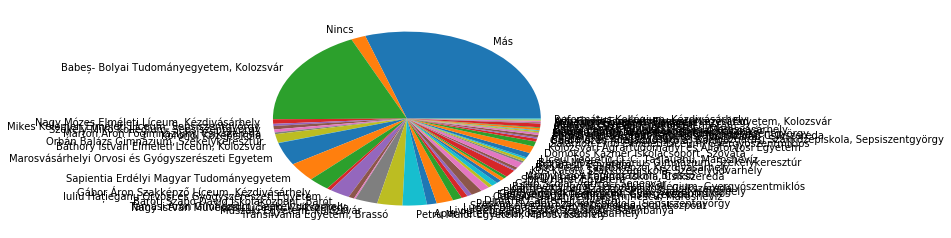

In [56]:
plt.pie(iskolak.values(),labels=[(i) for i in iskolak.keys()])
plt.show()

In [57]:
count =0;
for d in data:
    if "studwhere" in d:
        s = studdict(d["studwhere"]) 
        print(s,d["studwhere"])
        d["studwhere"] = s
        if(s=="Székelykeresztúri Zeyk Domokos Iskolaközpont"):
            count= count +1;

print(count)

Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Nincs none
Nagy István Művészeti Líceum, Csíkszereda nagy istván művészeti liceum
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte marosvásárhely
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Transilvania Egyetem, Brassó universitatea transilvania brasov
Tamási Áron Gimnázium, Székelyudvarhely egeszsegugyi foiskola szekelyudvarhely
Sapientia Erdélyi Magyar Tudományegyetem akg bp, sapientia emte csíkszereda
Tamási Áron Gimnázium, Székelyudvarhely egeszsegugyi liceum
Tamási Áron Gimnázium, Székelyudvarhely tamási Áron gimnázium
Egészségügyi Technikum, Csíkszereda egeszsegugyi technikum csikszereda
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem umf iuliu hatieganu cluj-napoca
Bányai János Szakközépiskola, Székelyudvarhely bányai jános műszaki szakközépiskola
Más uni wuppertal
Nincs az Élet iskolája
Más tessedik sámuel főiskola
Nagy Mózes Elméleti Líceum, Kézdivásárhely nagy

Más essential
Más bukarest
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Más tehnica sanitara
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Lucian Blaga Egyetem, Nagyszeben lucian blaga university of sibiu
Más rau, economia turismului intern si international,ase master:administrarea afacerilor in turism
Más semmelweis egyetem Áok
Más sc. postl. eugen nicoara m-ciuc
Más studiert entrepreneurship & business management hier: academia de studii economice din bucuresti
Spiru Haret Egyetem universitatea spiru haret, facultatea de drept si administratie publica
Hyperion Egyetem, Bukarest hyperion
Más szte-Ájtk
Más venczel józsef
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem
Berde Mózes Unitárius Gimnázium, Székelykeresztúr berde mózes unitárius gimnázium
Más uvvg
Más scoala postliceala eugen nicoara
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Korondi Középi

Kós Károly Szakközépiskola, Székelyudvarhely kós károly
Babeș- Bolyai Tudományegyetem, Kolozsvár facultatea de psihologie si stiinte ale educatiei, universitatea "babes-bolyai", cluj-napoca
Más colegiu
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Spiru Haret Egyetem spiru haret university
Más facultatea de psihologie
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o. c. taslauanu", toplita
Gheorghe Dima Zeneakadémia, Kolozsvár gheorghe dima music academy
Más blaj
Lucian Blaga Egyetem, Nagyszeben lucian blaga university of sibiu
Más akosfalvi altalanos iskola
Sapientia Erdélyi Magyar Tudományegyetem emte sapientia, csíkszereda
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Műszaki Egyetem, Kolozsvár technical university of cluj-napoca
Más george baritiu brassó
Más facultatea de inginerie aerospațiala - bucurești
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Liviu Rebreanu Sz

Spiru Haret Egyetem universitatea spiru haret brasov
Más academy of art ioan andreescu cluj (kolozsvár)
Más universitatea bogdan voda cluj napoca
Más grup scolar "lucian blaga"
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Babeș- Bolyai Tudományegyetem, Kolozsvár master mrai universitatea babes bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem
Más college of life and hard knocks
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Más technical university of madrid
Más scoala postliceala sanitara toplita
Más umf
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Más academia de studii economice bucuresti
Dimitrie Cantemir Egyetem universitatea crestina dimitrie cantemir
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Petru Maior Egyetem, Marosvásárhely universitatea petru maior


Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid szakközépiskola
Műszaki Egyetem, Kolozsvár technical university of cluj-napoca
Más fitness company - international school for fitness and recreation
Transilvania Egyetem, Brassó universitatea transilvania din brasov
Nagy Mózes Elméleti Líceum, Kézdivásárhely nagy mózes elméleti líceum - kézdivásárhely
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, csíkszereda
Más liceul teoretic nicolae balcescu cluj-napoca
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Márton Áron Főgimnázium, Csíkszereda márton Áron gimnázium, csíkszereda
Babeș- Bolyai Tudományegyetem, Kolozsvár babeŞ - bolyai tudományegyetem, sepsiszentgyörgy
Székely Mikó Kollégium, Sepsiszentgyörgy székely mikó kollégium
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Petru Maior Egyetem, Marosvásárhely petru maior universi

Transilvania Egyetem, Brassó universitatea transilvania din brasov
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Petru Maior Egyetem, Marosvásárhely grup scolar "petru maior" reghin
Más universitatea de medicina si farmacie din tg-mures
Kós Károly Szakközépiskola, Székelyudvarhely kós károly Építőipari szakközépiskola és szakmunkásképző
Nincs az Élet iskolája
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai tudományegyetem
Bányai János Szakközépiskola, Székelyudvarhely banyai janos
Babeș- Bolyai Tudományegyetem, Kolozsvár fsega
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babeș-bolyai university
Más louis pasteur egeszsegugyi posztliceum
Gépgyártó Iskolaközpont, Gyergyószentmiklós gépgyártó iskolaközpont
Babeș- Bolyai Tudományegyetem, Kolozsvár postliceal sanitar ,,victor babes"
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Kolozsvári Agrártudományi és Állatorvosi

Sapientia Erdélyi Magyar Tudományegyetem gazdasági informatika, sapientia emte
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy berde aron kereskeselmi szakkozepiskola
Más gazi Üniversitesi
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más nemzeti közszolgálati egyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Gheorghe Dima Zeneakadémia, Kolozsvár academia de muzica "gheorghe dima"
Más eötvös józsef szakközépiskola
Más colegiul national george baritiu
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf targu mures
Áprily Lajos Főgimnázium, Brassó aprily lajos
Gábor Áron Szakképző Líceum, Kézdivásárhely gábor Áron Általános iskola
Más zelyk domokos
Más scoala de arte si meserii todiresti(sam)
Más colegiul national inochentie micu clain
Ba

Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david
Más lsu paul m. hebert law center
Babeș- Bolyai Tudományegyetem, Kolozsvár master "dreptul european si național al afacerilor'''ubb
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Más liceul pedagogic mihai eminescu tg. mures
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Spiru Haret Egyetem universitatea spiru haret, facultatea de management brasov
Petru Maior Egyetem, Marosvásárhely universtitatea petru maior
Gheorghe Dima Zeneakadémia, Kolozsvár gheorghe dima music academy
Más universitatea tehnica de construcții bucurești
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o.c.taslauanu" toplita
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Más universitatea de vest din timisoara
Kolozsvári Agrártudomá

Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más páli szent vince egészségügyi posztliceum
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte marosvásárhely
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures medicina generala
Más udvarhely
Más benedek elek altalanos iskola
Székely Mikó Kollégium, Sepsiszentgyörgy székely mikó kollégium
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Más facultatea de mecanica din cluj
Más protestáns teológiai intézet kolozsvár
Transilvania Egyetem, Brassó ecobiotehnologii agricole si alimentare, universitatea transilvania
Liviu Rebreanu Szakközépiskola, Balánbánya liceul tehnologic liviu rebreanu balan
Apor Péter Iskolaközpont, Kézdivásárhely apor peter
Babeș- Bolyai 

Bányai János Szakközépiskola, Székelyudvarhely bányai jános szakközépiskola
Más facultatea de stiinte economice si gestiunea afacerilor
Műszaki Egyetem, Kolozsvár utcn
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más fitness akademia budapest
Nincs none
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Más pke nagyvárad
Más universitatea bucuresti
Más erhvervsakademiet lillebælt
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvasarhelyi orvosi es gyogyszereszeti egyetem
Műszaki Egyetem, Bukarest universitatea politehnica bucuresti
Más petőfi sándor elméleti liceum
Domokos Kázmér Iskolacsoport, Szováta domokos kazmer sovata
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más fejer akos
Képzőművészeti és Formatervezési E

Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvásárhelyi orvosi és gyógyszerészeti egyetem-fogorvostudományi kar
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu" balan
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, bölcsészkar
Más balanbanyai 1-es iskola - Școala gen. nr.1 balan
Spiru Haret Egyetem spiru haret university
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más fundatia laurentia
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Dimitrie Cantemir Egyetem unuversitarea dimitrie cantemir tg mures
Más liceul economic tg mures
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy targu mures
Más utrecht university of applied sciences
Gábor Áron Sza

Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o. c. taslauanu", toplita
Marosvásárhelyi Művészeti Egyetem művészeti egyetem, marosvásárhely
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvásárhelyi orvosi és gyógyszerészeti egyetem
Nincs none
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai and elte university budapest
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca/ facultatea constructii de masini
Dimitrie Cantemir Egyetem udc amf targu-mures
Székely Mikó Kollégium, Sepsiszentgyörgy szekely miko kollegium
Colegiul National Mihai Eminescu, Maroshévíz colegiul national "mihai eminescu" - pagina oficiala
Más facultatea de arhitectura si urbanism
Kós Károly Szakközépiskola, Székelyudvarhely kós károly
Nincs még nincs :d
Más scoala postliceala sanitara toplita
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más université paris quest nanterre la défense bgf pszk budapest
Petru Maior Egyetem, Marosvásárhely 

Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Más stiinte juridice si administrative
Más még nem járok
Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy mikes kelemen elméleti líceum
Más facultatea de geografie ub
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Műszaki Egyetem, Kolozsvár automatica si informatica aplicata, universitatea tehnica cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj napoca facultatea de matematica si informatica
Petru Maior Egyetem, Marosvásárhely grup scolar "petru maior" reghin
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más colegiul national "octavian goga" miercurea ciuc
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem
Mikes Kelem

Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem umf iuliu hatieganu cluj-napoca
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Spiru Haret Egyetem spiru haret university
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai university
Más universitatea " george baritiu" - brasov: economia comertului, turismuluisi serviciilor
Műszaki Egyetem, Kolozsvár kolozsvári műszaki egyetem
Más pécsi tudományegyetem Általános orvostudományi kar
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Transilvania Egyetem, Brassó facultatea de drept - universitatea transilvania bra?ov
Marosvásárhelyi Művészeti Egyetem universitatea de arte tg-mures
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdelyi magyar tudomanyegyetem
Más székely károly
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Transil

Más magyar nyelv és irodalom szak, kolozsvár
Más alexandru ceusianu
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai, fsega
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem
Sapientia Erdélyi Magyar Tudományegyetem sapientia, csikszereda
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem mogye
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Más eugen nicoara— sighișoara
Más 2 ipari liceum
Petru Maior Egyetem, Marosvásárhely universitarea petru maior tg.mures
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid
M

Babeș- Bolyai Tudományegyetem, Kolozsvár ubb - facultatea de stiinte economice si gestiunea afacerilor, cluj napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár facultatea de drept - universitatea babes-bolyai din cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes-bolyai, facultatea de chimie si inginerie chimica
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós batthyány ignác technikai kollégium
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem
Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy liceul de arta plugor sándor sf.gheorghe
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Transilvania Egyetem, Brassó universitatea transilvania din brasov
Más university of pécs
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Gheorghe Dima Zeneakadémia,

Tamási Áron Gimnázium, Székelyudvarhely tamÁsi Áron egÉszsÉgÜgyi teknikum
Más sepsiszentgyorgyi egeszsegugyi postliceum
Transilvania Egyetem, Brassó universitatea transilvania din brasov
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más universität passau
Grup Școlar AgricoL, Segesvár grup scolar agricol sighisoara
Marosvásárhelyi Művészeti Egyetem szinmuveszeti egyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Más university of debrecen
Más ase bucuresti, management
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Kós Károly Szakközépiskola, Székelyudvarhely kós károly Építőipari szakközépiskola és szakmunkásképző
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Márton Áron Főgimnázium, Csíkszereda márton Áron gimnázium
Gábor Áron Szakképző

Joannes Kájoni Szakközépiskola, Csíkszereda joannes kajoni
Más universitatea ecologica din bucuresti
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más protestant teological institute
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Más apáczai csere jános elméleti líceum
Más muegyetem brasso
Más corvinus university of budapest
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más pke,graphic designer
Babeș- Bolyai Tudományegyetem, Kolozsvár psihopedagogie speciala- universitatea babe?-bolyai, cluj-napoca
Más carol davila
Más i.b. rhema - timisoara
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Más miron cristea
Más károly róbert főiskola
Székelykeresztúri Zey

Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai, kolozsvár
Más "grup scolar radu petrescu"
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Nincs none
Bányai János Szakközépiskola, Székelyudvarhely bányai jános szakközépiskola
Kós Károly Szakközépiskola, Székelyudvarhely kós károly szakközépiskola, székelyudvarhely
Más puskás tivadar szakképző líceum-ditró
Gheorghe Dima Zeneakadémia, Kolozsvár gheorghe dima
Más sc postliceala sanitara
Más universitatea nationala de educatie fizica si sport bucuresti
Más upg ploiesti
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes-bolyai, facultatea de stiinta si ingineria mediului
Más scoala nationala de antrenori bucuresti
Más cluj university
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem, kolozsvár
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic octavian codru taslauanu
Más gate
Transilvania Egyetem, Brass

Babeș- Bolyai Tudományegyetem, Kolozsvár master resurse umane si sanatate orgaizationala, psihologie ubb
Liviu Rebreanu Szakközépiskola, Balánbánya liviu rebreanu balan
Más művészeti líceum, marosvásárhely
Más universitatea 1 decembrie 1918 alba iulia
Más academia de arta plastica si decorativa"ion andreescu" cluj-napoca
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Más eötvös józsef szakközépiskola székelyudvarhely
Más fitness akadémia
Más grup scolar industrial "stefan procopiu" vaslui
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Más nke-hhk
Transilvania Egyetem, Brassó universitatea transilvania brasov
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudomanyegyetem
Spiru Haret Egyetem universitatea spiru haret bucuresti
Más petőfi sándor gimnázium
Más medicina veterinaria
Babeș- Bolyai Tudomán

Más facultatea de psihologie si sociologie bucuresti
Bányai János Szakközépiskola, Székelyudvarhely bányai jános szakközépiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai university
Spiru Haret Egyetem universitatea spiru haret
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más petőfi sándor Általános iskola, székelykeresztúr
Liviu Rebreanu Szakközépiskola, Balánbánya liviu rebreanu balan
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai, cluj - napoca
Más facultea de drept din cadrul universitatii al i cuza
Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy mikes kelemen elmeleti liceum
Más elte tÓfk
Más károli gáspár református egyetem Állam- és jogtudományi kar
Grup Școlar AgricoL, Segesvár grup scolar agricol sighisoara
Sapientia Erdélyi Magyar Tudományegyetem sapientia, csikszereda
Gábor Áron Szakképző Líceum, Kézdivásárhely gábor Áron
Más facultatea de drept s

Lucian Blaga Egyetem, Nagyszeben lucian blaga university of sibiu
Más pali szent vince egeszsegugyi technikum
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Más universitatea ecologica din bucuresti
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Más werk akadémia
Sapientia Erdélyi Magyar Tudományegyetem sapientia, csikszereda
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más facultatea de drept
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós batthyány ignác technikai kollégium
Más pdc
Más aalborg universitet københavn - aau-cph
Más universitatea 1 decembrie 1918 alba iulia
Grup Școlar AgricoL, Segesvár grup scolar agricol sighisoara
Baróti Szabó Dávid Iskolaközpont

Lucian Blaga Egyetem, Nagyszeben universitatea lucian blaga sibiu
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más facultatea de educatie fizica si sport
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Gépgyártó Iskolaközpont, Gyergyószentmiklós gépgyártó iskolaközpont
Lucian Blaga Egyetem, Nagyszeben universitatea lucian blaga sibiu
Más egeszsegugyi posztliceum
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Áprily Lajos Főgimnázium, Brassó aprily lajos
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár fsega cluj-napoca
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Más eötvös józsef mezőgazdasági szakközépiskola
Műszaki Egyetem, Kolozsvár facultatea de automatica si calculatoare, universitatea tehnica din cluj-napoca
Más master degree in european private law
Más ase bucuresti - master contabilitate

Más hauptschule
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem iuliu haţieganu university of medicine and pharmacy
Más Építőmérnöki kar
Más egészségügyi technikum
Spiru Haret Egyetem spiru haret ucecom székelyudvarhely
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Domokos Kázmér Iskolacsoport, Szováta domokos kazmer sovata
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más tessedik sámuel főiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Bolyai Farkas Elméleti Líceum, Marosvásárhely bolyai farkas elméleti líceum
Babeș- Bolyai Tudományegyetem, Kolozsvár babeș-bolyai university
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más universitatea tehnica "gh. asachi" iasi
Más debreceni egyetem
Babeș-

Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai tudományegyetem
Sapientia Erdélyi Magyar Tudományegyetem sapientia university
Műszaki Egyetem, Kolozsvár facultatea de constructii cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte pszichológia
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Gábor Áron Szakképző Líceum, Kézdivásárhely gábor Áron
Más scoala gimanaziul "dacia"
Márton Áron Főgimnázium, Csíkszereda márton Áron gimnázium
Más gimnaziul augustin maior
Más cluj school of public health
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Nagy Imre Általános Iskola, Csíkszereda nagy imre altalanos iskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Orbán Balázs Gimnázium, Székelykereszt

Áprily Lajos Főgimnázium, Brassó aprily lajos
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más institutul politehnic traian vuia timisoara
Más master "stiinte penale si criminalistica"
Más palló imre művészeti szakközépiskola
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem,csikszereda
Kolozsvári Agrártudományi és Állatorvosi Egyetem usamv cluj-napoca
Más joseph haltrich
Gheorghe Dima Zeneakadémia, Kolozsvár academia de muzica "gheorghe dima"
Más adventista teológiai főiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más köllő miklós Általános iskola
Más universitatea de vest din timisoara
Babeș- Bolyai Tudományegyetem, Kolozsvár facultatea de litere, ubb
Dimitrie Cantemir Egyetem universitatea crestina" dimitrie cantemir" facultatea de stiinte economice
Más universitatea d

Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu toplita
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Transilvania Egyetem, Brassó facultatea de drept, universitatea "transilvania", brasov
Más nagy stephen m jr md
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj-napoca
Nagy István Művészeti Líceum, Csíkszereda nagy istván művészeti liceum
Marosvásárhelyi Művészeti Egyetem színházművészeti egyetem, marosvásárhely
Bányai János Szakközépiskola, Székelyudvarhely bányai jános szakközépiskola
Grup Școlar AgricoL, Segesvár grup scolar agricol sighisoara
Bányai János Szakközépiskola, Székelyudvarhely bányai jános szakközépiskola
Más date hódmezővásárhely
Más bucuresti
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Gépgyártó Iskolaközpont, Gyergyószentmiklós gépgyártó iskolaközpont
Más liceul teoretic "joseph haltrich" sighisoara
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Nagy M

Lucian Blaga Egyetem, Nagyszeben universitatea lucian blaga sibiu
Más kjf - kodolányi jános főiskola
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdelyi magyar tudomanyegyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj-napoca ,facultatea de educatie fizica si sport
Más liceul tehnologic nr.2- sighisoara
Spiru Haret Egyetem spiru haret university
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem umf iuliu hațieganu cluj-napoca
Apor Péter Iskolaközpont, Kézdivásárhely apor péter szakközépiskola
Más politechnika krakowska im. tadeusza kościuszki
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Áprily Lajos Főgimnázium, Brassó aprily lajos
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Nagy Mózes Elméleti Líceum, Kézdivásárhely nagy mózes elméleti líceum - kézdivásárhely
Más semmelweis university
Más colegiul national unirea
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david

Más nnnnnnnnnnnnnnnn
Más ------------------------
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid szakközépiskola
Gépgyártó Iskolaközpont, Gyergyószentmiklós gépgyártó iskolaközpont
Spiru Haret Egyetem liceul "spiru haret"
Más facultatea de stiinte economice si gestiunea afacerilor
Más universitatea "lucian blaga"- facultatea de drept "simion barnutiu" sibiu
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai, cluj - napoca
Más grup scolar agricol "haralamb vasiliu"
Grup Școlar AgricoL, Segesvár grup scolar agricol sighisoara
Más university of oradea
Gábor Áron Szakképző Líceum, Kézdivásárhely gábor Áron
Bányai János Szakközépiskola, Székelyudvarhely bányai jános szakközépiskola
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós batthyány ignác technikai kollégium
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Más gálfi sándor Á

Lucian Blaga Egyetem, Nagyszeben lucian blaga university of sibiu
Liceul Teoretic O. C. Taslauanu, Maroshévíz o.c. taslauanu toplita
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, csíkszereda
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david iskolakozpont
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem
Más universitatea "alexandru ioan cuza" din iaŞi
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más university of medicine & pharmacy tg. mures
Más g.s.i.u. sighisoara
Nincs scoala vietii
Más constantin brâncuși
Lucian Blaga Egyetem, Nagyszeben lucian blaga university of sibiu
Műszaki Egyetem, Kolozsvár facultatea de arhitectura si urbanism cluj-napoca
Spiru Haret Egyetem universitatea spiru haret
Babeș- Bolyai Tudományegyetem, Ko

Más semmelweis university
Más bocskai istvan nyaradszereda
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai, cluj - napoca
Más upm targu mures
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj napoca facultatea de matematica si informatica
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o.c.taslauanu" toplita
Más gyógyszerész asszisztens
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, történelem és filozófia kar
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Más university of oradea
Gaál Mózes Általános Iskola, Barót gaál mózes iskola
Babeș- Bolyai Tudományegyetem, Kolozsvár facultatea de sociologie si asistenta sociala, ubb
Gépgyártó Iskolaközpont, Gyergyószentmiklós gépgyártó iskolaközpont
Bolyai Farkas Elméleti Líceum, Marosvásárhely bolyai farkas elméleti líceum
Református Kollégium, Kézdivásárhely reformatus kollegium kezdivasarhely
Berde Mózes Unitárius Gimnázium, Székelykeresztúr berde mózes unitárius gimnázium
Lucian Blaga Egyet

Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más natur- og kulturformidlingsuddannelsen i hjørring
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Más endes józsef Általános iskola
Tamási Áron Gimnázium, Székelyudvarhely tamási Áron egészségügyi posztlic
Más ion mincu university of architecture and urbanism
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai facultatea de teologie greco-catolica, blaj
Babeș- Bolyai Tudományegyetem, Kolozsvár művészettörténet bbte
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mureș
Székelykeresztúri Zeyk Domokos Iskolaközpont zeyk domokos
Kós Károly Szakközépiskola, Székelyudvarhely kós károly Építőipari szakközépiskola és szakmunkásképző
Más bernády györgy iskola (2-es számú Általános iskola)
Domokos

Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más masini si instalati
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o.c.taslauanu" toplita
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más politecnico di milano
Áprily Lajos Főgimnázium, Brassó aprily lajos
Nincs none
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Más บ้านหนองแสง
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf targu mures
Babeș- Bolyai

Más colegiul national "octavian goga" miercurea-ciuc harghita
Más ase bucuresti
Kós Károly Szakközépiskola, Székelyudvarhely kós károly szakközépiskola
Nincs none
Más university of bedfordshire
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir tg-mures
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid
Más debreceni egyetem- műszaki kar
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Nincs az Élet iskolája
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Kolozsvári Agrártudományi és Állatorvosi Egyetem facultatea de medicina veterinara cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más ehess
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon erno
Más fundatia laurentia
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvásárhelyi orvosi és gyógyszerészeti egyetem
Más rastol

Műszaki Egyetem, Kolozsvár universitatea tehnica din cluj-napoca
Tamási Áron Gimnázium, Székelyudvarhely tamási Áron egészségügyi posztlic
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Transilvania Egyetem, Brassó universitatea transilvania din brasov
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david
Más károly róbert főiskola
Más liceul tehnologic "lucian blaga" reghin
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid
Lucian Blaga Egyetem, Nagyszeben lucian blaga university of sibiu
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o. c. taslauanu", toplita
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david szakozepiskola
Joannes Kájoni Szakközépiskola, Csíkszereda joannes kajoni
Spiru Haret Egyetem spiru haret university
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Petru Mai

Más academia de studii economice (ase)
Más protestant theological institute of cluj
Partiumi Keresztény Egyetem, Nagyvárad partiumi keresztény egyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más liceul teoretic nicolae balcescu cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb - facultatea de stiinte economice si gestiunea afacerilor, cluj napoca
Székelykeresztúri Zeyk Domokos Iskolaközpont zeyk domokos
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david iskolakozpont
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem universitatea de medicina si farmacie tg mures
Transilvania Egyetem, Brassó universitatea transilvania brasov, facultatea de muzica
Transilvania Egyetem, Brassó universitatea transilvania brasov
Kós Károly Szakközépiskola, Székelyudvarhely kós károly szakközépiskola, székelyudvarhely
Más alexandru ceusianu
Nincs az Élet iskolája
Lucian Blaga Egyetem, Nagyszeben universitatea lucian blaga sibiu, facultatea de drept "simion barnutiu"
Or

Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mureș
Más university of pécs
Más sövér elek szakközépiskola - gyergyóalfalu
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai, facultatea de drept
Transilvania Egyetem, Brassó universitatea transilvania din brasov
Más eu pass,budapest
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai, facultatea de sociologie si asistenta sociala
Más liceul de arte plastice romulus ladea
Más visit graz
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai university
Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy mikes kelemen liceum
Lucian Blaga Egyetem, Nagyszeben universitatea lucian blaga sibiu
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Más facultatea s.a.i.a.p.m. sibiu
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Sp

Nincs colegiul national andrei muresanu dej
Más balanbanyai 1-es iskola - Școala gen. nr.1 balan
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más elte - eötvös loránd tudományegyetem
Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy plugor sándor művészeti líceum
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, csíkszereda
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más lucian blaga
Más grupul scolar "gheorghe marinescu"
Más conservatorio di musica "g. verdi" di milano
Más elte ftt fordító- és tolmácsképző tanszék
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Más pke nagyvárad
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Más colegiul național "alexandru papiu ilarian"
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Joannes Kájoni Szakközépiskola, Csíkszereda joannes 

Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Lucian Blaga Egyetem, Nagyszeben lucian blaga university of sibiu
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte kommunikáció
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Székely Mikó Kollégium, Sepsiszentgyörgy székely mikó kollégium
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Áprily Lajos Főgimnázium, Brassó aprily lajos
Más Şcoala gimnaziala "alexandru ceu?ianu" - reghin
Dimitrie Cantemir Egyetem dimitrie cantemir
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Lucian Blaga Egyetem, Nagyszeben lucian blaga university of sibiu
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Más kóós károly
Más szte-ttik
Műszaki Egyetem, Kolozsvár universitatea tehnica din cluj-napoca
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o. c. taslauanu", toplit

Liviu Rebreanu Szakközépiskola, Balánbánya liviu rebreanu balan
Sapientia Erdélyi Magyar Tudományegyetem sapientia university
Más joseph haltrich
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai tudományegyetem
Spiru Haret Egyetem facultatea de arte spiru haret-bucuresti
Más ucdc drept
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Spiru Haret Egyetem universitatea spiru haret bucuresti
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb
Liviu Rebreanu Szakközépiskola, Balánbánya liceul tehnologic liviu rebreanu balan
Gépgyártó Iskolaközpont, Gyergyószentmiklós gépgyártó iskolaközpont
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más eötvös józsef szakközépiskola
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai, fsega
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Lucian Blaga Egyetem, Nagyszeben lucian b

Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy berde aron
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más international institute of tourism and management, krems
Babeș- Bolyai Tudományegyetem, Kolozsvár babes bolyai tudományegyetem pszichológia és neveléstudományok kar
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Más syddansk universitet kolding
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más pke nagyvárad
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Nincs none
Képzőművészeti és Formatervezési Egyetem, Kolozsvár universitatea de arta si design - cluj napoca
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy berde Áron közgazdasági és közigazgatási szakközépiskola
Petru Maior Egyetem, Marosvásárhely universitatea "petru maior"
Transilvania 

Más colegiul tehnic apulum alba iulia
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu" balan
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más magyar nyelv és irodalom szak, kolozsvár
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte
Babeș- Bolyai Tudományegyetem, Kolozsvár babes bolyai tudomany egyetem , szekelyudvarhely
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy berde Áron közgazdasági és közigazgatási szakközépiskola
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más bmi
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más liceul teoretic "joseph haltrich" sighisoara
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Műszaki Egyetem, Temesvár facultatea de inginerie hunedoara - universitatea politehnica timisoara
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david iskolakozpont
Műszaki Egyetem, Kolozsvár universitatea tehnica din cluj-

Más corvinus university of budapest
Más pécsi tudományegyetem
Műszaki Egyetem, Kolozsvár universitatea tehnica din cluj-napoca
Nagy Mózes Elméleti Líceum, Kézdivásárhely nagy mózes elméleti líceum - kézdivásárhely
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Sapientia Erdélyi Magyar Tudományegyetem sapientia, csikszereda
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Más gheorghe asachi technical university of ia?i
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Más university of debrecen
Más universitatea de stiinte agricole si medicina veterinar cluj-napoca
Műszaki Egyetem, Kolozsvár utcn
Lucian Blaga Egyetem, Nagyszeben universitatea lucian blaga sibiu
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Spiru Haret Egyetem spiru haret
Domokos Kázmér Iskolacsoport, Szováta domokos kaz

Más fspac - extensia universitara sfantu gheorghe
Más ...
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem, kolozsvár
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvasarhelyi orvosi es gyogyszereszeti egyetem
Gábor Áron Szakképző Líceum, Kézdivásárhely gabor aron liceum-kezdivasarhely
Áprily Lajos Főgimnázium, Brassó aprily lajos
Más scoala postliceala „louis pasteur" din miercurea-ciuc
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más ekf eger
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy grup scolar economic "berde aron", sfantu gheorghe, covasna
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár fsega
Babeș- Bolyai Tudományegyetem, Kolozsvár universitate

Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más bgf - budapesti gazdasági főiskola
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mureș
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid
Más budapest média intézet
Más universitatea tehnica de constructii bucuresti
Más moscow power engineering institute
Más marketing si comert exterior
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Más liceul industrial ludus
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Bukaresti Egyetem universitatea din bucuresti
Nincs none
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem mogye
Korondi Középiskola korondi középiskola
Márton Áron Főgimnázium, Csíkszereda márton Áron gimnázium, csíkszereda
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon erno
Marosvásárhelyi Orvosi és Gyógysz

Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Más amf eugen nicoara
Nagy Mózes Elméleti Líceum, Kézdivásárhely nagy mózes elméleti líceum
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem universitatea de medicina si farmacie "iuliu hatieganu" cluj napoca
Nagy Imre Általános Iskola, Csíkszereda nagy imre
Más ismail qemali vlore
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvasarhelyi orvosi es gyogyszereszeti egyetem
Műszaki Egyetem, Kolozsvár technical university of cluj-napoca
Transilvania Egyetem, Brassó universitatea transilvania brasov
Kós Károly Szakközépiskola, Székelyudvarhely kos karoly
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Kolozsvári Agrártudományi és Állatorvosi Egyetem usamv cluj
Más colegiul national "octavian goga" miercurea-ciuc harghita
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon erno gimnazium
Marosvá

Babeș- Bolyai Tudományegyetem, Kolozsvár babaes-bolyai tudomanyegyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem
Joannes Kájoni Szakközépiskola, Csíkszereda joannes kajoni
Más upt facultatea de constructii
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvásárhelyi orvosi és gyógyszerészeti egyetem
Colegiul National Mihai Eminescu, Maroshévíz colegiul national "mihai eminescu" - pagina oficiala
Más kajoni janos
Apor Péter Iskolaközpont, Kézdivásárhely apor péter szakközépiskola
Colegiul National Mihai Eminescu, Maroshévíz colegiul national "mihai eminescu" - pagina oficiala
Más szekely karoly
Más balneofizioterapia
Más the university of nottingham
Más mÜtf
Transilvania Egyetem, Brassó universitatea transilvania brasov
Más széchenyi istván egyetem
M

Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár babaes-bolyai tudomanyegyetem
Más scoala romana de afaceri alba
Más g.s.i.u. sighisoara
Más b.b.t.e testneveles es sport-gyogytorna
Más -
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon ernő elméleti líceum
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Tamási Áron Gimnázium, Székelyudvarhely tamási Áron Általános iskola farkaslaka
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Liviu Rebreanu Szakközépiskola, Balánbánya liviu rebreanu balan
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf fogorvosi kar
Nincs az Élet iskolája
Bányai János Szakközépiskola, Székelyudvarhely bányai jános
Református Kollégium, Kézdivásárhely reformatus kollegium kezdivasarhely
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon erno
Spiru Haret Egyetem spiru haret-management
Más institutul diplomatic român
Más scoala militara de 

Gábor Áron Szakképző Líceum, Kézdivásárhely gabor aron szentegyhaza
Marosvásárhelyi Művészeti Egyetem szentgyörgyi istván szinművészeti egyetem-marosvásárhely
Tamási Áron Gimnázium, Székelyudvarhely tamasi aron altalanos iskola
Áprily Lajos Főgimnázium, Brassó aprily lajos
Gaál Mózes Általános Iskola, Barót gaál mózes iskola
Más facultatea de sociologie si asistenta sociala
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más universitatea bogdan voda cluj management
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Babeș- Bolyai Tudományegyetem, Kolozsvár babeș-bolyai tudományegyetem
Dimitrie Cantemir Egyetem facultatea de drept dimitrie cantemir cluj-napoca
George Barițiu Egyetem, Barassó universitatea "george baritiu" brasov
Nincs még nincs
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántusományok kara
Más kocsis pál mgszki
Más academia navala "mircea cel batrân"
Bod Péter Tanítóképző, Kézdivásárhely bod péter tanítóképző - 

Domokos Kázmér Iskolacsoport, Szováta domokos kazmer sovata
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid szakközépiskola
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más universitatea "dunarea de jos" din galati
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mureș
Bányai János Szakközépiskola, Székelyudvarhely bányai jános szakközépiskola
Más starr king school for the ministry
Más colegiul national "mircea eliade" sighisoara
Más mÜtf (modern Üzleti tudományok főiskolája)
Transilvania Egyetem, Brassó universitatea transilvania brasov, facultatea de litere
Más kőrösi csoma sándor-iskolaközpont, kovászna
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem - gyergyószentmiklós
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai university
Kós Károly Szakközépiskola, Székelyudvarhely kós károly szakközépiskola

Dimitrie Cantemir Egyetem universitatea dimitrie cantemir tg-mures
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más alberto hurtado university
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más ppke btk kommunikáció és média intézet
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Babeș- Bolyai Tudományegyetem, Kolozsvár babes bolyai tudományegyetem pszichológia és neveléstudományok kar
Más budapest university of technology and economics
Más art and design university of cluj-napoca
Gábor Áron Szakképző Líceum, Kézdivásárhely gábor Áron liceum szentegyháza
Más vencel jozsef
Babeș- Bolyai Tudományegyetem, Kolozsvár fsega
Más grupul scolar "electromures"
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir tg-mures
Sapientia Erdélyi Magyar Tudományegyetem sapientia university
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Babeș

Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár pszichológia babes-bolyai egyetem kolozsvár
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Kós Károly Szakközépiskola, Székelyudvarhely kós károly Építőipari szakközépiskola és szakmunkásképző
Más egeszsegugyi asszisztens
Korondi Középiskola korondi középiskola
Más grup scolar silvic gurghiu
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Más facultatea de industria lemnului
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Dimitrie Cantemir Egyetem universitatea crestina dimitrie cantemir brasov
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj-napoca
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Orbán Baláz

Más universitatea bucuresti, facultatea de litere
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Grup Școlar AgricoL, Segesvár grup scolar agricol sighisoara
Más székely bertalan Általános iskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon ernő gimnázium, gyergyószentmiklós
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Más orvosi es gyogyszereszeti egyetem
Más aviator college
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más .............................
Petru Maior Egyetem, Marosvásárhely petru maior tg mures
Műszaki Egyetem, Kolozsvár universitatea tehnica din cluj-napoca
Más fisir
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Nincs az Élet iskolája
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Babeș- Bolyai Tudományegyetem

Székely Mikó Kollégium, Sepsiszentgyörgy székely mikó kollégium
Dimitrie Cantemir Egyetem dimitrie cantemir tg mures
Tamási Áron Gimnázium, Székelyudvarhely tamási Áron gimnázium
Más Şcoala gimnaziala "alexandru ceu?ianu" - reghin
Sapientia Erdélyi Magyar Tudományegyetem sapientia, csikszereda
Más universitatea bucuresti, facultatea de jurnalism si stiintele comunicarii
Más manchester metropolitan university
Babeș- Bolyai Tudományegyetem, Kolozsvár psihologie si stiinte ale educatiei ubb cluj ex tg mures
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más kèzdivásàrhely, covasna, romania
Más nyugat mo.-i egyetem
Más szent istván mezőgazdasági és Élelmiszeripari szakképző iskola
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf targu mures
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon ernő gimnázium
Grup Școlar A

Más szte-jgypk
Más colegiul tehnic edmond nicolau
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más grup scolar "nicolae balcescu" intorsura-buzaului
Márton Áron Főgimnázium, Csíkszereda márton Áron gimnázium, csíkszereda
Más -
Bod Péter Tanítóképző, Kézdivásárhely bod péter tanítóképző - kézdivásárhely
Babeș- Bolyai Tudományegyetem, Kolozsvár fsega
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvasarhelyi orvosi es gyogyszereszeti egyetem
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Gaál Mózes Általános Iskola, Barót gaál mózes iskola
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Más orvosi es gyogyszereszeti egyetem marosvasarhely
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj-napoca - fspac - publicitate
Más elite cosmetix körmös akadémia
Más colegiul national "mircea eliade" sighisoara
Más pszichológia ma
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai, cl

Más balanbanyai 1-es iskola - Școala gen. nr.1 balan
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes-bolyai facultatea de litere
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más kemeny janos elmeleti liceum
Képzőművészeti és Formatervezési Egyetem, Kolozsvár universitatea de arta si design - cluj napoca
Transilvania Egyetem, Brassó universitatea transilvania, facultatea bsi
Petru Maior Egyetem, Marosvásárhely petru maior
Más eötvös józsef mezőgazdasági szakközépiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Más zimmethusen
Más palló imre művészeti szakközépiskola
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem
Liviu Rebreanu Szakközépiskola, Balánbánya liceul tehnologic liviu rebreanu balan
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir t

Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai, fsega
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem iuliu haţieganu university of medicine and pharmacy
Más stiinte si litere
Más ~
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Más facultatea de psihologie-pedagogie din brasov
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david iskolakozpont
Nincs nincsi
Más drept
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai, cluj - napoca
Kolo

Marosvásárhelyi Művészeti Egyetem marosvásárhelyi művészeti egyetem
Más eszterházy károly főiskola, eger
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Spiru Haret Egyetem spiru haret university
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj-napoca ,facultatea de educatie fizica si sport
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más facultatea de stiinte economice
Más esmt berlin
Babeș- Bolyai Tudományegyetem, Kolozsvár facultatea de sociologie si asistenta sociala, ubb
Más református kollégium sepsiszentgyörgy
Colegiul National Mihai Eminescu, Maroshévíz colegiul national "mihai eminescu"
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Transilvania Egyetem, Brassó universitatea transilvania, facultatea de litere, brasov
Kolozsvári Agrártudományi és Állatorvosi Egyetem usamv cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más universitatea de stiinte agricole si medicina veterinara 

Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Liviu Rebreanu Szakközépiskola, Balánbánya liceul tehnologic liviu rebreanu balan
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai | facultatea de drept
Transilvania Egyetem, Brassó transylvania university
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai facultatea de educatie fizica si sport
Más még nem tartok ott
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai | facultatea de drept
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem, marosvásárhely
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david iskolakozpont
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más university of oxford
Más gyulakuti altalanos iskola
Dimitrie Cantemir Egyetem universitatea dimit

Más gyergyószentmiklós
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david iskolakozpont
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon erno gimnazium
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid szakközépiskola
Más asistent medical generalist
Más universidad de las américas udla providencia
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, kolozsvár
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic octavian codru taslauanu
Spiru Haret Egyetem facultatea spiru haret
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Más trinity house community resource centre
Más sövér elek szakközépiskola - gyergyóalfalu
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Gaál Mózes Általános Iskola, Barót gaál mózes iskola
Más facultatea de design de produs si mediu, brasov
Nagy Mózes Elméleti Líceum, Kézdivásárhely nagy mózes elméleti líceum - kézdivásárhely
B

Más universitatea titu maiorescu
Más facultatea de stiinte economice si gestiunea afacerilor
Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy plugor sandor muveszeti liceum
Tamási Áron Gimnázium, Székelyudvarhely tamási Áron gimnázium
Más grup scolar "traian vuia"
Más hec lausanne
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o.c.taslauanu" toplita
Spiru Haret Egyetem arhitectura spiru haret
Transilvania Egyetem, Brassó universitatea transilvania brasov
Apor Péter Iskolaközpont, Kézdivásárhely apor péter szakközépiskola
Más ulb sibiu
Református Kollégium, Kézdivásárhely református kollégium kézdivásárhely
Más eötvös józsef mezőgazdasági szakközépiskola
Más scoala postliceala sanitara
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Kolozsvári Agrártudományi és Állatorvosi Egyetem usamv cluj-napoca - fmv
Kolozsvári Agrártudományi és Állatorvosi Egyetem usamv cluj
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Kolozsvári Agrártu

Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós batthyány ignác technikai kollégium
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid szakközépiskola
Más trinity house community resource centre
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Más universitatea technica
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mureș
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david vilany serelo
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes bolyai, facultatea de educatie fizica si sport
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Grup Școlar AgricoL,

Más upg ploiesti
Bányai János Szakközépiskola, Székelyudvarhely dr banyai janos
Más egeszsegugyi foiskola
Lucian Blaga Egyetem, Nagyszeben universitatea lucian blaga sibiu, facultatea de jurnalistica
Más liceul teoretic mircea eliade sighisoara
Más kemeny janos elmeleti liceum
Más colegiul tehnic târnaveni - "liceul de chimie"
Más academia de studii economice bucuresti
Más kemény jános elméleti líceum
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más liceul teoretic "joseph haltrich" sighisoara
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Más university of oradea
Székelykeresztúri Zeyk Domokos Iskolaközpont zeyk domokos
Dimitrie Cantemir Egyetem dimitrie cantemir
Műszaki Egyetem, Kolozsvár utcn
Más university of phoenix
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb
Más private
Kolozsvári Agrártudományi és Állatorvosi Egyetem universitatea de stiinte agricole si medicina veterinara cluj-napoca
Apor Péter Iskolaközpont, Kézdivásárhely apor péter

Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Spiru Haret Egyetem spiru haret university
Más grup Școlar „miron cristea” subcetate
Sapientia Erdélyi Magyar Tudományegyetem sapientia university
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid szakközépiskola
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy berde Áron
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Transilvania Egyetem, Brassó universitatea transilvania brasov
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvásárhelyi orvosi és gyógyszerészeti egyetem
Gheorghe Dima Zeneakadémia, Kolozsvár academia de muzica g

Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Transilvania Egyetem, Brassó universitatea transilvania brasov
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o. c. taslauanu", toplita
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Más iba international business academy
Más magyar nyelv és irodalom szak, kolozsvár
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, kolozsvár
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Más sc postliceala sanitara
Más louis pasteur egészségügyi központ
Más eötvös józsef szakközépiskola
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Babeș- Bolyai Tudományegyetem, Kolozsvár facultatea de teatru ?i televiziune, ubb cluj
Bod Péter Tanítóképző, Kézdivásárhely bod péter tanítóképző - kézdivásárhely


Más ucn hjørring
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai, cluj - napoca
Más tirgu mures
Más istanbul kültür Üniversitesi
Más gheorghe sincai high school
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Műszaki Egyetem, Kolozsvár automatica si informatica aplicata, universitatea tehnica cluj-napoca
Más universitatea dimitrie-cantemir,cluj-napoca ,specialitatea drept
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem iuliu hațieganu university of medicine and pharmacy
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o. c. taslauanu", toplita
Liviu Rebreanu Szakközépiskola, Balánbánya liviu rebreanu balan
Más facultatea de psihologie si stiinte ale educatiei
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Kolozsvári Agrártudományi és Állatorvosi Egyetem universitatea de stiinte agricole si medicina veterinara cluj-napoca
Gheorghe Dima Zeneakadémia, Kolozsvár academia de muzica "gheorghe 

Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más universidad de zaragoza, aragón
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Más universitatea alexandru ioan cuza, iasi
Liviu Rebreanu Szakközépiskola, Balánbánya liviu rebreanu balan
Más universitatea petrol-gaze
Joannes Kájoni Szakközépiskola, Csíkszereda joannes kajoni
Más district institute of education and training (diet) mandi
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Nagy István Művészeti Líceum, Csíkszereda nagy istván művészeti liceum
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy grup scolar economic "berde aron", sfantu gheorghe, covasna
Puskás Tivad

Bukaresti Egyetem universitatea din bucuresti
Joannes Kájoni Szakközépiskola, Csíkszereda joannes kajoni
Más liceul teoretic "joseph haltrich" sighisoara
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Más traian vuia
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid
Más masterat consiliere si interventii psihologice in dezvoltarea umana
Más mateinfo
Más ezután
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai university
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Bod Péter Tanítóképző, Kézdivásárhely bod péter tanítóképző - kézdivásárhely
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvásárhelyi orvosi és gyógyszerészeti egyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb drept
Dimitrie Cantemir Egyetem facultatea de drept dimitrie cantemir cluj-napoca
Áprily Lajos Főgimnázium, Brassó aprily lajos
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai


Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem
Más colegiul tehnic "petru poni" onesti
Más uned cantabria
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon ernő elméleti líceum
Más szegedi tudományegyetem jogász
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós batthyány ignác technikai kollégium
Más starr king school for the ministry
Nagy István Művészeti Líceum, Csíkszereda nagy istván művészeti liceum
Gépgyártó Iskolaközpont, Gyergyószentmiklós gépgyártó iskolaközpont
Más liceul teoretic "joseph haltrich" sighisoara
Más petőfi sándor Általános iskola, székelykeresztúr
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Más facultatea de stiinte economice si gestiunea afacerilor cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai university, cluj-napoca
Má

Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mureș
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Kós Károly Szakközépiskola, Székelyudvarhely kos karoly csikszereda
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte református tanárképző kar
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem, kolozsvár
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más universitatea "petrol-gaze" ploiești
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Petru Maior Egyetem, Marosvásárhely universtitatea petru maior
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, emte sapientia
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Nincs none
Más dr.p.boros fortunát,zetelaka
Más universitatea de arhitectura si urbanism

Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Más colegiul national "mircea eliade" sighisoara
Más károli gáspár református egyetem tanítóképző főiskolai kar
Más northwestern university
Más semmelweis university
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Más elte ppk
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Joannes Kájoni Szakközépiskola, Csíkszereda joannes kajoni
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai university
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid szakközépiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Spiru Haret Egyetem universitatea spiru haret
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Spiru Haret Egyetem spiru haret university
Sapientia Erd

Babeș- Bolyai Tudományegyetem, Kolozsvár fsega
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Más u.s.a.m.v. bucuresti
Kolozsvári Agrártudományi és Állatorvosi Egyetem usamv cluj
Más ppke-jÁk
Képzőművészeti és Formatervezési Egyetem, Kolozsvár universitatea de arta si design - cluj napoca
Más universitatea de arte si design
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Nagy István Művészeti Líceum, Csíkszereda nagy istván művészeti liceum
Más istituto tecnico agrario siena
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Más facultatea de muzica
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babaes bolyai fsega
Más johannes kajoni
Más aca

Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o.c.taslauanu" toplita
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvasarhelyi orvosi es gyogyszereszeti egyetem
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Spiru Haret Egyetem universitatea spiru haret, facultatea de drept si administratie publica
Más 8általános
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david iskolakozpont
Más ogyi marosvasrhely
Más egézségügyi főiskola sepsiszentgyörgy
Babeș- Bolyai Tudományegyetem, Kolozsvár facultatea de business, ubb
Bod Péter Tanítóképző, Kézdivásárhely bod péter tanítóképző - kézdivásárhely
Más kereskedelem
Kolozsvári Agrártudományi és Állatorvosi Egyetem universitatea de stiinte agricole si medicina veterinara cluj-napoca
Liviu Rebreanu Szakközépiskola, Balá

Más dicle Üniversitesi
Más ‎تدريب الصيادلة أون لاين‎
Gheorghe Dima Zeneakadémia, Kolozsvár academia de muzica "gheorghe dima"
Gábor Áron Szakképző Líceum, Kézdivásárhely gabor aron szentegyhaza
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más asistent medical generalist
Más universitatea de medicina si farmacie carol davila bucuresti
Nagy Mózes Elméleti Líceum, Kézdivásárhely nagy mózes elméleti líceum - kézdivásárhely
Gépgyártó Iskolaközpont, Gyergyószentmiklós gépgyártó iskolaközpont
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Petru Maior Egyetem, Marosvásárhely universitatea petru maior tg. mures
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon ernő elméleti líceum
Más jelky andrás szakképző iskola és kollégium
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Nagy Mózes Elméleti Líceum, Kézdivásárhely nagy mózes elméleti líceum - kézdivásárhely

Más colegiul tehnic "anghel saligny"
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj-napoca
Tamási Áron Gimnázium, Székelyudvarhely tamási Áron gimnázium
Berde Mózes Unitárius Gimnázium, Székelykeresztúr berde mózes unitárius gimnázium
Korondi Középiskola korondi középiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem, kolozsvár
Más szie
Bukaresti Egyetem politehnica university of bucharest
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Sapientia Erdélyi Magyar Tudományegyetem sapientia university
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mureș
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon erno
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Babeș- Bolyai Tudományegyetem, Kolozsvár

Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Joannes Kájoni Szakközépiskola, Csíkszereda joannes kajoni
Nincs none
Nagy Mózes Elméleti Líceum, Kézdivásárhely nagy mózes elméleti liceum
Más erdőszentgyörgy
Más london art college
Műszaki Egyetem, Kolozsvár facultatea de arhitectura si urbanism cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más university of florida
Más liceul teoretic "bartók béla" timisoara
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai, fsega
Más liceul teoretic "téglás gábor" elméleti líceum deva
Babeș- Bolyai Tudományegyetem, Kolozsvár babaes-bolyai tudomanyegyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj biologie
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más Óbudai egyetem bánki donát gépész és biztonságtechnikai mérnöki 

Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Lucian Blaga Egyetem, Nagyszeben universitatea lucian blaga sibiu
Más lsu paul m. hebert law center
Más eszterházy károly főiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más theology
Más mÜtf (modern Üzleti tudományok főiskolája)
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid szakközépiskola
Más gyulafehérvár, budapest
Más elte
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár facultatea de drept - ubb cluj
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Nincs none
Más universitatea de arhitectura și urbanism ion mincu


Más liceul teoretic "joseph haltrich" sighisoara
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon erno
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvasarhelyi orvosi es gyogyszereszeti egyetem
Liceul Teoretic O. C. Taslauanu, Maroshévíz o.c. taslauanu toplita
Bányai János Szakközépiskola, Székelyudvarhely bányai jános műszaki szakközépiskola
Más venczel józsef
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Transilvania Egyetem, Brassó transilvania university
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Márton Áron Főgimnázium, Csíkszereda márton Áron gimnázium, csíkszereda
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Transilvania Egyetem, Brassó universitatea transilvan

Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Más mbc - molecular biotechnology center
Más utp petrosani
Kós Károly Szakközépiskola, Székelyudvarhely kós károly szakközépiskola, székelyudvarhely
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más institutul politehnic cluj napoca
Más universitatea de arhitectura si urbanism "ion mincu"
Babeș- Bolyai Tudományegyetem, Kolozsvár facultatea de Ştiinţe politice, administrative ?i ale comunicarii, ubb cluj
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Apor Péter Iskolaközpont, Kézdivásárhely apor péter szakközépiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más gate logisztikai kar
Babeș- Bolyai Tudományegyetem, Kolozsvár facultatea de geografie turism babes bolyai
Más facultatea de litere
Gábor Áron Szakképző Líceum, Kézdivásá

Más universitatea româno-americana
Műszaki Egyetem, Kolozsvár facultatea de electronica, telecomunicaţii ?i tehnologia informaţiei (utcn)
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Sapientia Erdélyi Magyar Tudományegyetem sapientia university
Más budapest kortars táncművészeti iiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár ubb cluj-napoca drept
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai university
Colegiul National Mihai Eminescu, Maroshévíz colegiul national "mihai eminescu"
Más Óbudai egyetem
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy berde Áron közgazdasági és közigazgatási szakközépiskola
Más educatie fizica si sporturi montane
Sapientia Erdélyi Magyar Tudományegyetem sapientia university
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai, cluj - napoca
Más szie- alkalmazott bölcsészeti kar
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Kós Károly Szakközépi

Más czech university of life sciences prague
Más technical university of dresden
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Gábor Áron Szakképző Líceum, Kézdivásárhely gabor aron
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem, kolozsvár
Más egeszsegugyi posztliceum
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más teologie gr.cat. - franceza
Más il brasov
Más s.illyes lajos
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvásárhelyi orvosi és gyógyszerészeti egyetem
Más facultatea de constructii iasi
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más Óbudai egyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Áprily Lajos Főgimnázium, Brassó aprily lajos
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai university
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy berde aron
Más fogarassy mihály Általános is

Más protestáns teológiai intézet kolozsvár
Joannes Kájoni Szakközépiskola, Csíkszereda joannes kajoni
Műszaki Egyetem, Kolozsvár utcn
Transilvania Egyetem, Brassó universitatea transilvania brasov
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Más brassói egyetemen
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david iskolakozpont
Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy liceul de arta plugor sándor sf.gheorghe
Más mÜtf
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Más scoala postliceala sanitara toplita
Székely Mikó Kollégium, Sepsiszentgyörgy székely mikó kollégium
Székely Mikó Kollégium, Sepsiszentgyörgy székely mikó kollégium
Más nepi egyetem csik-szereda
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más feg asistent medical de farmacie
Batthyány

Más east surrey college
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más jósika miklós Általános iskola
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid szakközépiskola
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem
Más liceul industrial nr.3 c.f.r. brasov
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes-bolyai cluj napoca,faculty of theater and tv
Marosvásárhelyi Művészeti Egyetem magyar képzőművészeti egyetem
Más kolozzsvári elektro
Székely Mikó Kollégium, Sepsiszentgyörgy mikó imre szakkollégium
Babeș- Bolyai Tudományegyetem, Kolozsvár fsega - facultatea de Ştiinţe economice ?i gestiunea afacerilor ubb
Lucian Blaga Egyetem, Nagyszeben universitatea lucian blaga sibiu
Más venczel józsef
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Bolyai Farkas Elméleti Líceum, Marosvásárhely bo

Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más oxford de mangalia
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Székelykeresztúri Zeyk Domokos Iskolaközpont zeyk domokos technológiai líceum
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Kós Károly Szakközépiskola, Székelyudvarhely kós károly Építőipari szakközépiskola és szakmunkásképző
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más ntnu
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Marosvásárhelyi Művészeti Egyetem marosvasarhelyi szinmuveszeti egyetem
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Más liceul teoretic nicolae titulescu pucioasa
Képzőművészeti és Formate

Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Más lemmens institute leuven
Más bucharest sae
Kós Károly Szakközépiskola, Székelyudvarhely kós károly Építőipari szakközépiskola és szakmunkásképző
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem, kolozsvár
Más kemeny janos elmeleti liceum
Bod Péter Tanítóképző, Kézdivásárhely bod péter tanítóképző - kézdivásárhely
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Más universitatea de stiinte agricole si medicina veterinara "ion ionescu de la brad" iasi
Korondi Középiskola korondi középiskola
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem mogye, marosvásárhely
Más nics
Műszaki Egyetem, Kolozsvár utcn
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy grup scolar economic "berde aron", sfantu gheorghe, covasna
Baróti Szabó Dávid Iskolaközpont, Barót baroti szabo david iskolakozpont
Petru Maior Egyetem, Marosvásárhely grup scolar "petru maior" reghin
Más bened

Dimitrie Cantemir Egyetem universitatea crestina dimitrie cantemir brasov
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Kós Károly Szakközépiskola, Székelyudvarhely kós károly Építőipari szakközépiskola és szakmunkásképző
Nincs none
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem - gyergyószentmiklós
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más liceul tehnologic "lucian blaga" reghin
Áprily Lajos Főgimnázium, Brassó aprily lajos
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Más pécsi tudományegyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más universita' cattolica del sacro cuore, milano; university of memphis
Más shinshu university 信州大学
Más eötvös józsef szakközépiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvar
Más cursul de coaf

Marosvásárhelyi Művészeti Egyetem marosvásárhelyi színművészeti egyetem
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Más református kollégium sepsiszentgyörgy
Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy puskás tivadar szakközépiskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai, facultatea de business
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Grup Școlar AgricoL, Segesvár grup scolar agricol sighisoara
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai,facultatea de litere
Marosvásárhelyi Művészeti Egyetem universitatea de arte din targu mures
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más itcg g. g. marconi
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Más szent 

Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Colegiul National Mihai Eminescu, Maroshévíz colegiul national mihai eminescu,toplita,harghita
Transilvania Egyetem, Brassó universitatea transilvania brasov
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Transilvania Egyetem, Brassó universitatea transilvania din brasov
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mure?
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más scoala de corectie
Más ase management
Transilvania Egyetem, Brassó universitatea transilvania din brasov
Műszaki Egyetem, Kolozsvár facultatea de arhitectura si urbanism cluj-napoca
Petru Maior Egyetem, 

Más pszichológia és neveléstudományok
Más színművészeti főiskola, marosvásárhely
Más bethlen gábor Általános iskola
Babeș- Bolyai Tudományegyetem, Kolozsvár babeș-bolyai tudományegyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár masterand la managementul organizatiilor si activitatiilor sportive-ubb
Más ifma - aubière
Más bethlen gabor kollegium nagyenyed
Más s.illyes lajos
Babeș- Bolyai Tudományegyetem, Kolozsvár bábes bolyai
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Műszaki Egyetem, Kolozsvár utcn
Más universitatea tehnica "gh. asachi" iasi
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai, fsega
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy tg mures
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Nincs none
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
D

Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic octavian codru taslauanu
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvasarhelyi orvosi es gyogyszereszeti egyetem
Colegiul National Mihai Eminescu, Maroshévíz colegiul national "mihai eminescu" toplita
Márton Áron Főgimnázium, Csíkszereda mártonffi jános Általános iskola
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Dimitrie Cantemir Egyetem universitatea crestina dimitrie cantemir, facultatea de drept
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Transilvania Egyetem, Brassó universitatea "transilvania" brasov, kinetoterapie
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Más eötvös józsef szakközépiskola székelyudvarhely
Más bgf kvik
Más zimmethusen
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Baróti Szabó Dávid Iskolaközpont, Barót b

Más colegiul national octavian goga
Spiru Haret Egyetem facultatea de drept si administratie publica spiru haret bucuresti
Más kodolanyi janos university college
Más bögöz-i Általános iskola
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Műszaki Egyetem, Kolozsvár universitatea tehnica cluj-napoca
Más cristi_boy1996@yahoo.com
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai university
Tamási Áron Gimnázium, Székelyudvarhely tamási Áron gimnázium székelyudvarhely
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mureș
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon erno
Gépgyártó Iskolaközpont, Gyergyószentmiklós gépgyártó iskolaközpont
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más petőfi sándor Általános iskola, székelykeresztúr
Bod Péter Tanítóképző, Kézdivásárhely bod péter tanítóképző - kézdivásárhely
Sz

Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babe?-bolyai
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte
Más scoala postliceala sanitara toplita
Más orvosi és gyógyszerészeti egyetem
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium, székelykeresztúr
Bolyai Farkas Elméleti Líceum, Marosvásárhely bolyai farkas elméleti líceum
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdelyi magyar tudomanyegyetem
Más david guetta
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Más bme - kognitív tudományi tanszék
Kolozsvári Agrártudományi és Állatorvosi Egyetem usamv cluj
Sapientia Erdélyi Magyar Tudományegyetem sapientia erdélyi magyar tudományegyetem
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Más műszaki egyetem-mechanika
Székelykeresztúri Zeyk Domokos Iskolaközpont zeyk domokos technológiai líceum
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Márton Áron Főgimnázium, Csíkszereda márton Áron gimná

Más harvard university
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem umf iuliu hateganu cluj-napoca
Babeș- Bolyai Tudományegyetem, Kolozsvár bbte, kolozsvár
Domokos Kázmér Iskolacsoport, Szováta domokos kázmér iskolacsoport
Liviu Rebreanu Szakközépiskola, Balánbánya grup scolar "liviu rebreanu"
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Más university of pireaus
Gábor Áron Szakképző Líceum, Kézdivásárhely gÁbor Áron szakkÖzÉpiskola
Más gyogyszereszeti
Más facultate
Más mÜtf
Dimitrie Cantemir Egyetem dimitrie cantemir
Segítő Mária Római Katolikus Gimnázium, Csíkszereda segítő mária római katolikus gimnázium
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Gaál Mózes Általános Iskola, Barót gaál mózes iskola
Más bgf
Műszaki Egyetem, Kolozsvár utcn
Más uaic iasi / facultatea de istorie
Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy plugor sándor művészeti líceum
Babeș- Bolya

Segítő Mária Római Katolikus Gimnázium, Csíkszereda segítő mária római katolikus gimnázium
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy berde Áron
Más elte btk
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más józsef attila álltalános iskola
Dimitrie Cantemir Egyetem universitatea dimitrie cantemir targu-mures
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem marosvásárhelyi orvosi és gyógyszerészeti egyetem
Liceul Teoretic O. C. Taslauanu, Maroshévíz liceul teoretic "o.c.taslauanu" toplita
Transilvania Egyetem, Brassó universitatea transilvania brasov
Márton Áron Főgimnázium, Csíkszereda márton Áron gimnázium, csíkszereda
Más colegiul emil negrutiu
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Tamási Áron Gimnázium, Székelyudvarhely tamasi aron altalanos iskola
Kós Károly Szakközépiskola, Székelyud

Lucian Blaga Egyetem, Nagyszeben lucian blaga university of sibiu
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf tg mures
Más Árpádházi szent erzsébet római katolikus gimnázium
Dimitrie Cantemir Egyetem scoala postliceala sanitara dimitrie cantemir
Más colegiul tehnic "iuliu maniu" carei
Más liceul tehnologic "lucian blaga" reghin
Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babes - bolyai, cluj - napoca
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem umf targu mures
Más puskás tivadar szakképző líceum-ditró
Más university of pécs
Más venczel józsef
Nagy Mózes Elméleti Líceum, Kézdivásárhely nagy mózes elméleti líceum - kézdivásárhely
Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós batthyány ignác technikai kollégium
Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Sapientia Erdélyi Magyar Tudományegyetem sapientia emte, műszaki és humántudományok kar, marosvásárhely
Pet

Babeș- Bolyai Tudományegyetem, Kolozsvár universitatea babeŞ - bolyai
Más louis pasteur egészségügyi főiskola
Transilvania Egyetem, Brassó colegiul economic transilvania
Orbán Balázs Gimnázium, Székelykeresztúr orbán balázs gimnázium
Más benedek elek tanítóképző, székelyudvarhely
Más corvinus university of budapest
Babeș- Bolyai Tudományegyetem, Kolozsvár babes-bolyai tudományegyetem
Transilvania Egyetem, Brassó transilvania brasov , facultatea de educatie fizica si sport
Petru Maior Egyetem, Marosvásárhely universitatea petru maior
Más sövér elek szakközépiskola - gyergyóalfalu
Más debreceni egyetem
Babeș- Bolyai Tudományegyetem, Kolozsvár fsega
Más brasso közgáz
Babeș- Bolyai Tudományegyetem, Kolozsvár f.s.e.g.a
Más grup.scolar. ioan bojor.reghin
Más liceul teoretic "joseph haltrich" sighisoara
Baróti Szabó Dávid Iskolaközpont, Barót baróti szabó dávid
Partiumi Keresztény Egyetem, Nagyvárad partiumi kereszteny egyetem, nagyvarad
Műszaki Egyetem, Kolozsvár technical university of cluj

Petru Maior Egyetem, Marosvásárhely petru maior university of târgu mureș
Más iskola
Más universitatea de arte si design
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Más liceul tehnologic nr.2- sighisoara
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem university of medicine and pharmacy of târgu mureș
Apor Péter Iskolaközpont, Kézdivásárhely apor péter mezőgazdasági iskolaközpont tanulói- kézdivásárhely
Salamon Ernő Elméleti Líceum, Gyergyószentmiklós salamon erno
Más pte-mk
Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy berde Áron közgazdasági és közigazgatási szakközépiskola
Liviu Rebreanu Szakközépiskola, Balánbánya liviu rebreanu balan
Babeș- Bolyai Tudományegyetem, Kolozsvár babe?-bolyai university
Gépgyártó Iskolaközpont, Gyergyószentmiklós gépgyártó iskolaközpont
Babeș- Bolyai Tudományegyetem, Kolozsvár fsega cluj-napoca
Más jósika miklós Általános iskola
Sapientia Erdélyi Magyar Tudományeg